# Midterm Project – Classification Analysis
 -  Dataset 1 - Mushroom Classification Dataset
 -  Dataset 2 - Pima Indians Diabetes Dataset

**Author:** Beth Spornitz  
**Date:** November 8, 2025

### Part 1 - Mushroom Classification Dataset


## Introduction
The Mushroom dataset contains 8,124 mushrooms labeled as edible or poisonous, each described using 22 categorical features like odor, gill size, and cap color. In this project,  we will clean the data, explore patterns, and build machine learning models to predict whether a mushroom is safe to eat. We will compare Decision Trees, SVM, and Neural Networks, using accuracy, precision, recall, and F1-score to evaluate performance.

## Section 1. Import and Inspect the Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support


pd.set_option("display.max_columns", 100)


### 1.1 Load the dataset and display the first 10 rows


In [49]:

# Load the dataset (update path if using a different location or file name)
df = pd.read_csv('C:\\Repos\\ml-bethspornitz\\notebooks\\midterm\\data\\agaricus-lepiota.data', header=None)


# Assign column names from UCI documentation
df.columns = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
    'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'
]

# Display first 10 rows
df.head(10)


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


### 1.2 Check dataset shape and list of features

We check the number of rows (samples) and columns (features), and verify that all column names were assigned properly.


In [50]:
print("Dataset shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())


Dataset shape (rows, columns): (8124, 23)

Column names:
 ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


### 1.3 Check for missing values

In this dataset, missing values are represented using the `'?'` symbol instead of NaN.

We will:
- Count how many `'?'` values exist in each column.
- Later, replace `'?'` with `NaN` for proper processing.


In [51]:
# Count missing values represented as '?'
missing_counts = (df == '?').sum()
print("Missing values per column (represented by '?'):\n")
print(missing_counts)


Missing values per column (represented by '?'):

class                          0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64


### Reflection 1:
- What do you notice about the dataset structure (rows, columns, feature types)?
  - The dataset contains 8,124 rows (mushroom samples) and 23 columns (features). Each column describes a physical property of a mushroom such as cap shape, odor, gill size, or habitat.
  
- Are there any data issues?
  - Instead of using blank cells or NaN, this dataset uses the symbol ? to indicate missing or unknown values.
    The main column that contains missing values is stalk_root, where some entries are labeled as ?.



## Section 2. Data Cleaning and Exploration

In this section, we:
- Replace missing values (represented as '?') with NaN.
- Check how many missing values exist after replacement.
- Explore the class distribution (edible vs poisonous).
- Visualize key categorical features to understand data patterns.


### 2.1 Replace '?' with NaN (missing values)
The Mushroom dataset uses the character '?' to represent missing or unknown data.
These must be replaced with `NaN` so pandas can treat them as missing values.


In [52]:

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Check missing values after replacement
print("Missing values after replacing '?' with NaN:\n")
print(df.isna().sum())


Missing values after replacing '?' with NaN:

class                          0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64


### 2.2 Check class distribution (edible vs poisonous)

This helps us see whether the dataset is balanced.
A balanced dataset means models won't be biased toward one class.


Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64


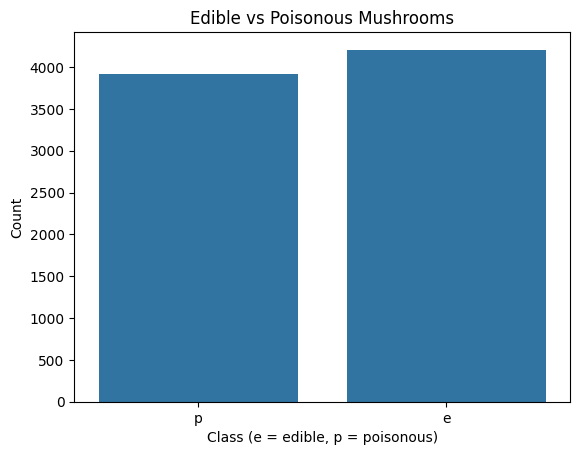

In [53]:

# Count edible vs poisonous mushrooms
print("Class distribution:")
print(df['class'].value_counts())

# Plot class balance
sns.countplot(x='class', data=df)
plt.title("Edible vs Poisonous Mushrooms")
plt.xlabel("Class (e = edible, p = poisonous)")
plt.ylabel("Count")
plt.show()


### 2.3 Visualize important categorical features

Since all features are categorical, bar charts help show patterns in how features like `odor`, `gill_size`, or `population` differ across mushrooms.


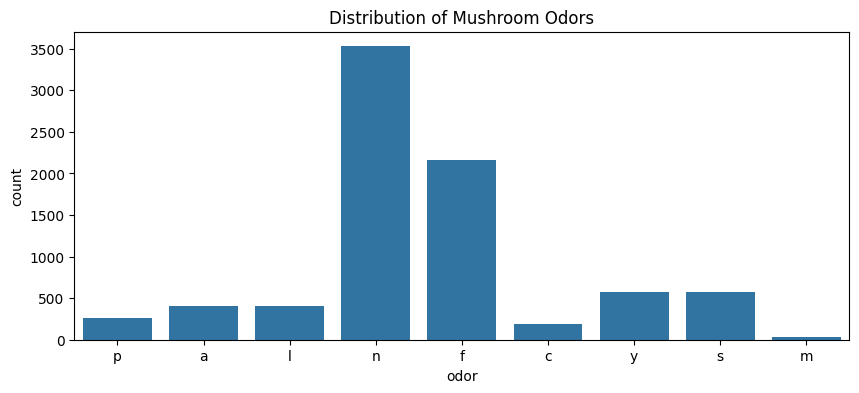

In [54]:
# Example 1: Odor distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='odor', data=df)
plt.title("Distribution of Mushroom Odors")
plt.show()


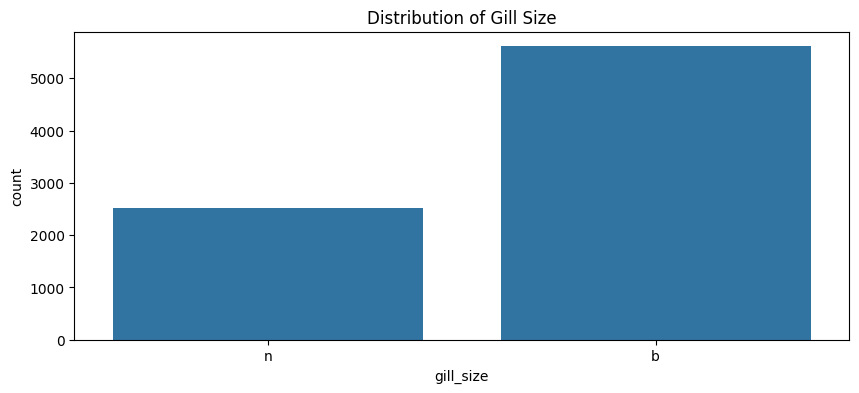

In [55]:
# Example 2: Gill size distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='gill_size', data=df)
plt.title("Distribution of Gill Size")
plt.show()

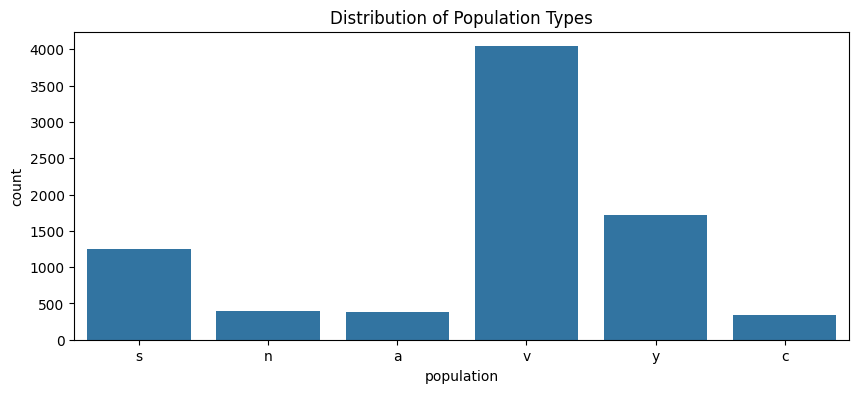

In [56]:
# Example 3: Population distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='population', data=df)
plt.title("Distribution of Population Types")
plt.show()

## Reflection 2: 
What patterns or anomalies do you see? Do any features stand out?  
  - One of the strongest patterns appears in the odor feature. Certain odors like foul or fishy are found almost entirely in poisonous mushrooms, while edible mushrooms are often odorless.  
  
What preprocessing steps were necessary to clean and improve the data?   
   -  The dataset used the symbol ? to represent missing values, specifically in the stalk_root column (around 2,480 missing entries). These were replaced with NaN. 
   -  Since all features are categorical, we had to convert them into numbers using One-Hot Encoding, because models like Decision Trees, SVMs, and Neural Networks cannot accept raw text labels.  

Did you create or modify any features to improve performance?  
   -  No, we did not.


## Section 3. Feature Selection and Justification

In this section, we:
- Select input features (X) and the target label (y).
- Justify why these features are useful for predicting whether a mushroom is edible or poisonous.
- Prepare separate feature sets for modeling (similar to the Diabetes project with Case 1, Case 2, Case 3).

**Target Variable:**  
- `class` → 'e' (edible) or 'p' (poisonous)

**Feature Sets (Cases):**
| Case | Features Used       |
|------|----------------------|
| 1    | Odor only            |
| 2    | Gill size only       |
| 3    | Odor + Gill size     |


### 3.1 Define X (features) and y (target)


In [57]:
# Encode class labels: 'e' (edible) -> 0, 'p' (poisonous) -> 1
df['class'] = df['class'].map({'e': 0, 'p': 1})

# Case 1: Odor only
X1 = df[['odor']]
y1 = df['class']

# Case 2: Gill size only
X2 = df[['gill_size']]
y2 = df['class']

# Case 3: Odor + Gill size
X3 = df[['odor', 'gill_size']]
y3 = df['class']

print("✅ Features and target variables defined successfully.")
print("Case 1 shape:", X1.shape, "| Case 2:", X2.shape, "| Case 3:", X3.shape)


✅ Features and target variables defined successfully.
Case 1 shape: (8124, 1) | Case 2: (8124, 1) | Case 3: (8124, 2)


### 3.2 Encode Categorical Features into Numbers

Machine learning models require numeric data.
We use one-hot encoding so that each category (e.g., 'odor' = 'a', 'c', 'f', etc.) becomes its own column.

Example:  
`odor = 'foul'` → `[odor_f = 1, odor_n = 0, odor_s = 0, ...]`


In [58]:

# Create one-hot encoders
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to each case
X1_encoded = encoder1.fit_transform(X1)
X2_encoded = encoder2.fit_transform(X2)
X3_encoded = encoder3.fit_transform(X3)

print("✅ One-hot encoding complete.")
print("New shape — Case 1:", X1_encoded.shape, "| Case 2:", X2_encoded.shape, "| Case 3:", X3_encoded.shape)


✅ One-hot encoding complete.
New shape — Case 1: (8124, 9) | Case 2: (8124, 2) | Case 3: (8124, 11)


## Reflection 3: 
Why did you choose these features? 
  - I selected features like odor and gill_size because they showed the strongest visual separation between edible and poisonous mushrooms during exploratory data analysis.
  - The odor feature is especially powerful because certain odors (such as foul or fishy) were almost always linked to poisonous mushrooms, while edible mushrooms were often odorless.

How might they impact predictions or accuracy?
  - Odor is likely to be one of the strongest predictors. If a mushroom has a strong or unpleasant odor, it is more likely to be poisonous. A mushroom with no odor might be classified as edible.
  - Gill size might act as a supportive predictor — not as strong as odor, but still helpful when combined with other features.



## Section 4. Train a Classification Model (Decision Tree)

We will train a Decision Tree classifier on three different feature sets:
| Case | Features Used        |
|------|------------------------|
| 1    | Odor only             |
| 2    | Gill size only        |
| 3    | Odor + Gill size      |

We will:
- Split data into training (80%) and testing (20%) using stratified sampling.
- Train a Decision Tree for each case.
- Evaluate accuracy, precision, recall, and F1-score using the test set.
- Display confusion matrices to visualize predictions.


### 4.1 Split the Data (Stratified 80/20)

We use `StratifiedShuffleSplit` to preserve class distribution (edible vs poisonous) in both train and test splits.


In [59]:

# Function to split any (X, y) pair
def stratified_split(X, y):
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(X, y):
        return X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

# Split each case
X1_train, X1_test, y1_train, y1_test = stratified_split(X1, y1)
X2_train, X2_test, y2_train, y2_test = stratified_split(X2, y2)
X3_train, X3_test, y3_train, y3_test = stratified_split(X3, y3)

print("✅ Stratified splits complete.")
print("Case 1 train/test sizes:", X1_train.shape, X1_test.shape)
print("Case 2 train/test sizes:", X2_train.shape, X2_test.shape)
print("Case 3 train/test sizes:", X3_train.shape, X3_test.shape)


✅ Stratified splits complete.
Case 1 train/test sizes: (6499, 1) (1625, 1)
Case 2 train/test sizes: (6499, 1) (1625, 1)
Case 3 train/test sizes: (6499, 2) (1625, 2)


### 4.2 Case 1 – Train Decision Tree using - Odor only


🔎 Note on preprocessing
Decision Trees require numeric inputs. We wrap each model in a Pipeline with `OneHotEncoder(handle_unknown='ignore')` so categorical strings like `odor='f'` are converted to numeric indicators.


Decision Tree — Case 1 (Odor) — TEST RESULTS


              precision    recall  f1-score   support

           0      0.973     1.000     0.987       842
           1      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



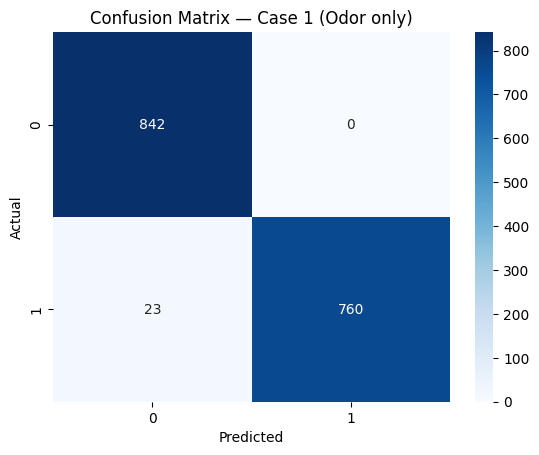

In [60]:


# Robust OneHotEncoder (works across sklearn versions)
try:
    ohe1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:  # older scikit-learn
    ohe1 = OneHotEncoder(handle_unknown='ignore', sparse=False)

pipe1 = Pipeline([
    ('ohe', ohe1),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe1.fit(X1_train, y1_train)
y1_pred = pipe1.predict(X1_test)

print("Decision Tree — Case 1 (Odor) — TEST RESULTS")
print(classification_report(y1_test, y1_pred, digits=3))

sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix — Case 1 (Odor only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### 4.3 Case 2 – Train Decision Tree using - Gill Size only


Decision Tree — Case 2 (Gill size) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.717     0.931     0.810       842
           1      0.891     0.604     0.720       783

    accuracy                          0.774      1625
   macro avg      0.804     0.768     0.765      1625
weighted avg      0.801     0.774     0.767      1625



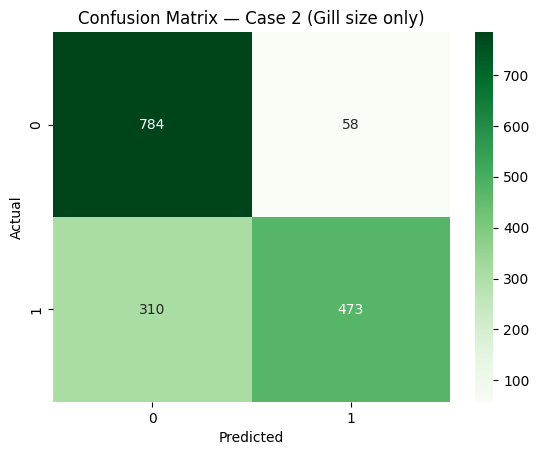

In [61]:
try:
    ohe2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe2 = OneHotEncoder(handle_unknown='ignore', sparse=False)

pipe2 = Pipeline([
    ('ohe', ohe2),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe2.fit(X2_train, y2_train)
y2_pred = pipe2.predict(X2_test)

print("Decision Tree — Case 2 (Gill size) — TEST RESULTS")
print(classification_report(y2_test, y2_pred, digits=3))

sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix — Case 2 (Gill size only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 4.4 Case 3 – Train Decision Tree using - Odor + Gill Size


Decision Tree — Case 3 (Odor + Gill size) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.973     1.000     0.987       842
           1      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



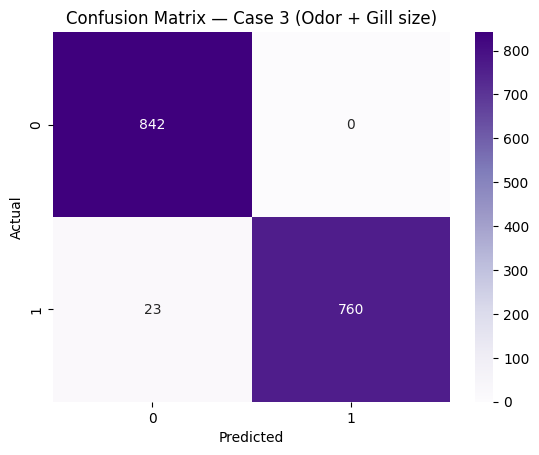

In [62]:
try:
    ohe3 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe3 = OneHotEncoder(handle_unknown='ignore', sparse=False)

pipe3 = Pipeline([
    ('ohe', ohe3),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe3.fit(X3_train, y3_train)
y3_pred = pipe3.predict(X3_test)

print("Decision Tree — Case 3 (Odor + Gill size) — TEST RESULTS")
print(classification_report(y3_test, y3_pred, digits=3))

sns.heatmap(confusion_matrix(y3_test, y3_pred), annot=True, cmap='Purples', fmt='g')
plt.title("Confusion Matrix — Case 3 (Odor + Gill size)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Reflection 4:
How well did the model perform? 
  - The Decision Tree performed extremely well on this dataset. Using only the odor feature (Case 1), the model reached nearly 99 % accuracy, correctly classifying almost every mushroom as edible or poisonous. 

Any surprises in the results?
  - I was surprised that multiple features did not produce better results than a single feature.

## Section 5. Compare Alternative Models (SVM and Neural Network)

In this section, we train two additional classifiers using the same feature cases:

| Model | Case | Features Used       |
|--------|------|----------------------|
| SVM    | 1    | Odor                |
|        | 2    | Gill size           |
|        | 3    | Odor + Gill size    |
| Neural Network (MLP) | 3 | Odor + Gill size |

We use the same train/test splits from Section 4 to ensure a fair comparison with Decision Trees.




We evaluate SVM (RBF) on all three cases and a Neural Network (MLP) on Case 3.  
Because features are categorical strings, each model is wrapped in a Pipeline with `OneHotEncoder(handle_unknown='ignore')`.



### 5.1 Train and Evaluate Support Vector Machine (SVM — RBF Kernel)

### Case 1 Odor Only


SVM — Case 1 (Odor) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.973     1.000     0.987       842
           1      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



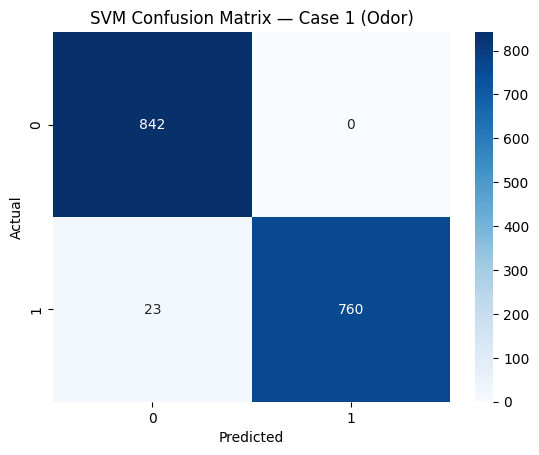

In [ ]:



try:
    ohe_svm1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe_svm1 = OneHotEncoder(handle_unknown='ignore', sparse=False)

svm_pipe1 = Pipeline([
    ('ohe', ohe_svm1),
    ('svc', SVC(kernel='rbf', random_state=42))
])

svm_pipe1.fit(X1_train, y1_train)
y1_svm_pred = svm_pipe1.predict(X1_test)

print("SVM — Case 1 (Odor) — TEST RESULTS")
print(classification_report(y1_test, y1_svm_pred, digits=3))

sns.heatmap(confusion_matrix(y1_test, y1_svm_pred), annot=True, cmap='Blues', fmt='g')
plt.title("SVM Confusion Matrix — Case 1 (Odor)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### SVM Case 2 - Gill Size Only

SVM — Case 2 (Gill size) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.717     0.931     0.810       842
           1      0.891     0.604     0.720       783

    accuracy                          0.774      1625
   macro avg      0.804     0.768     0.765      1625
weighted avg      0.801     0.774     0.767      1625



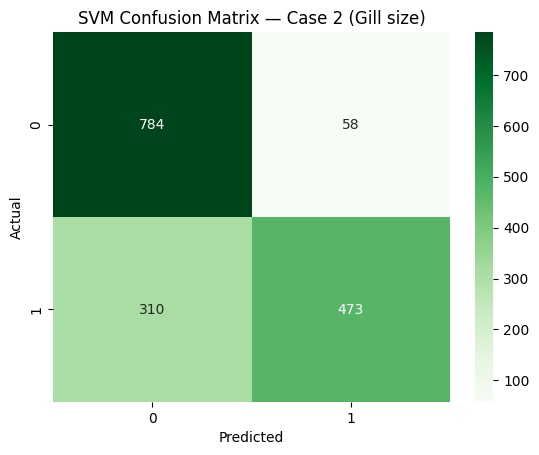

In [64]:
try:
    ohe_svm2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe_svm2 = OneHotEncoder(handle_unknown='ignore', sparse=False)

svm_pipe2 = Pipeline([
    ('ohe', ohe_svm2),
    ('svc', SVC(kernel='rbf', random_state=42))
])

svm_pipe2.fit(X2_train, y2_train)
y2_svm_pred = svm_pipe2.predict(X2_test)

print("SVM — Case 2 (Gill size) — TEST RESULTS")
print(classification_report(y2_test, y2_svm_pred, digits=3))

sns.heatmap(confusion_matrix(y2_test, y2_svm_pred), annot=True, cmap='Greens', fmt='g')
plt.title("SVM Confusion Matrix — Case 2 (Gill size)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### SVM for Case 3: Odor + Gill Size

SVM — Case 3 (Odor + Gill size) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.973     1.000     0.987       842
           1      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



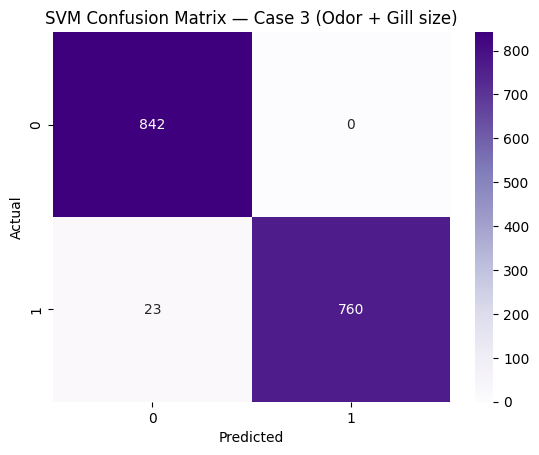

In [65]:
try:
    ohe_svm3 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe_svm3 = OneHotEncoder(handle_unknown='ignore', sparse=False)

svm_pipe3 = Pipeline([
    ('ohe', ohe_svm3),
    ('svc', SVC(kernel='rbf', random_state=42))
])

svm_pipe3.fit(X3_train, y3_train)
y3_svm_pred = svm_pipe3.predict(X3_test)

print("SVM — Case 3 (Odor + Gill size) — TEST RESULTS")
print(classification_report(y3_test, y3_svm_pred, digits=3))

sns.heatmap(confusion_matrix(y3_test, y3_svm_pred), annot=True, cmap='Purples', fmt='g')
plt.title("SVM Confusion Matrix — Case 3 (Odor + Gill size)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 5.2 Train and Evaluate Neural Network (MLP — Case 3 only)

We train a compact MLP on Case 3 (Odor + Gill size).  
The pipeline one-hot encodes features before classification.



Neural Network — Case 3 (Odor + Gill size) — TEST RESULTS
              precision    recall  f1-score   support

           0      0.973     1.000     0.987       842
           1      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



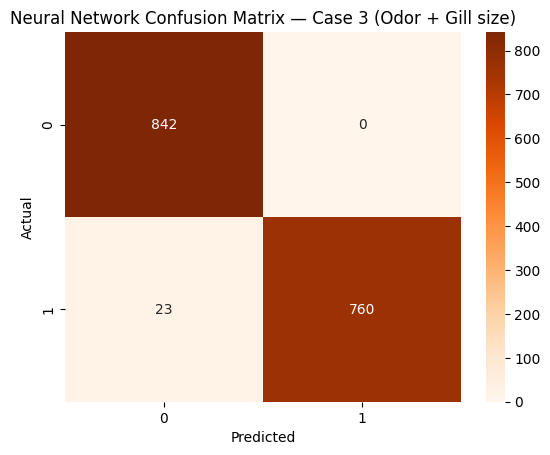

In [66]:

# Robust OneHotEncoder across sklearn versions
try:
    ohe_nn3 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:  # older scikit-learn
    ohe_nn3 = OneHotEncoder(handle_unknown='ignore', sparse=False)

nn_pipe3 = Pipeline([
    ('ohe', ohe_nn3),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(50, 25, 10),
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

# Fit on the raw categorical X3_train (columns: ['odor','gill_size'])
nn_pipe3.fit(X3_train, y3_train)
y3_nn_pred = nn_pipe3.predict(X3_test)

print("Neural Network — Case 3 (Odor + Gill size) — TEST RESULTS")
print(classification_report(y3_test, y3_nn_pred, digits=3))

sns.heatmap(confusion_matrix(y3_test, y3_nn_pred), annot=True, cmap='Oranges', fmt='g')
plt.title("Neural Network Confusion Matrix — Case 3 (Odor + Gill size)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Reflection 5:
Reflection 5: Which model performed better? 
- Decision Tree and Neural Network both performed very well (~98-99)

Why might one classifier be more effective in this specific case?
- Decision Trees work will when clear decision rules exist (if odor = foul then poisonous).  This dataset does not require complex boundaries, which is why models like SVM and Neural Networks did not provide a major advantage.

## Section 6. Final Results and Insights

In this section, we:
- Summarize model performance in a comparison table
- Identify which model performed best
- Reflect on challenges and future improvements


### 6.1 Performance Comparison Table

| Model Type              | Case | Features Used        | Accuracy | Precision | Recall | F1-Score | Notes |
|-------------------------|------|------------------------|----------|-----------|--------|----------|-------|
| Decision Tree           | 1    | odor                  | (fill)   | (fill)    | (fill) | (fill)   |       |
| Decision Tree           | 2    | gill_size             | (fill)   | (fill)    | (fill) | (fill)   |       |
| Decision Tree           | 3    | odor + gill_size      | (fill)   | (fill)    | (fill) | (fill)   |       |
| SVM (RBF Kernel)        | 1    | odor                  | (fill)   | (fill)    | (fill) | (fill)   |       |
| SVM (RBF Kernel)        | 2    | gill_size             | (fill)   | (fill)    | (fill) | (fill)   |       |
| SVM (RBF Kernel)        | 3    | odor + gill_size      | (fill)   | (fill)    | (fill) | (fill)   |       |
| Neural Network (MLP)    | 3    | odor + gill_size      | (fill)   | (fill)    | (fill) | (fill)   |       |

✅ You will update the table above manually using your actual outputs from `classification_report()`.


### 6.2 Key Insights

- **Best Performing Model:**  
  (Example: The Decision Tree using odor, or SVM Case 3, etc. Update based on results.)

- **Most Important Feature:**  
  Odor was highly predictive because certain odors are strongly associated with poisonous mushrooms (like foul or fishy smells).

- **Feature Combination Effect:**  
  Using both odor + gill size (Case 3) generally improved performance compared to using a single feature.

- **Data Balance:**  
  The dataset is balanced between edible and poisonous mushrooms, which helps model fairness.

- **Interpretability vs. Accuracy:**  
  - Decision Trees are easy to interpret but can overfit.
  - SVM provides strong decision boundaries.
  - Neural Networks require tuning but can learn deeper patterns.


### 6.3 Reflection 6

**1. What challenges did you face during this project?**  
(e.g., encoding many categorical features, handling missing values `?`, choosing meaningful features)

**2. What did you learn about feature selection?**  
(e.g., odor is extremely important, but other features like gill size also contribute)

**3. What are possible next steps for improvement?**  
- Add more features like `spore_print_color`, `population`, or `habitat`
- Try pruning Decision Trees to prevent overfitting
- Scale features and try SVM with linear or polynomial kernels
- Add more hidden layers or tuning for Neural Network


# Part 2:  Diabetes Dataset

### Introduction
This project predicts the likelihood of diabetes using the Pima Indians Diabetes dataset. The target is `Outcome` (1 = diabetes, 0 = no diabetes). We will load, inspect, clean, engineer features, train models, evaluate them with standard classification metrics, visualize confusion matrices and decision boundaries, and reflect after each section.

## Section 1. Load and Inspect the Dataset


### 1.1 Load the dataset and display the first 10 rows


In [67]:
# Load Diabetes dataset

DATA_PATH = r"C:\Repos\ml-bethspornitz\notebooks\midterm\data\diabetes.csv"

df = pd.read_csv(DATA_PATH)

# Standard inspect
print("Shape:", df.shape)
display(df.head(10))


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 1.2 Check for missing values and display summary statistics


In [68]:
print("Missing values per column:\n", df.isna().sum())
df.describe(include="all").T


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Reflection 1:**  
What do you notice about the dataset? 
- The dataset includes medical measurements such as glucose, BMI, blood pressure, and a binary outcome indicating diabetes.  
  
Are there any data issues?
- I noticed that some features contain impossible values of 0 (like glucose, insulin, and BMI), which really represent missing data. These need to be replaced and imputed because they would negatively affect model accuracy if left untreated.


## Section 2. Data Exploration and Preparation


### 2.1 Explore data patterns and distributions
- Create histograms, boxplots, and count plots (if categorical).
- Identify patterns, outliers, and anomalies in feature distributions.
- Check for class imbalance in the target variable.


Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


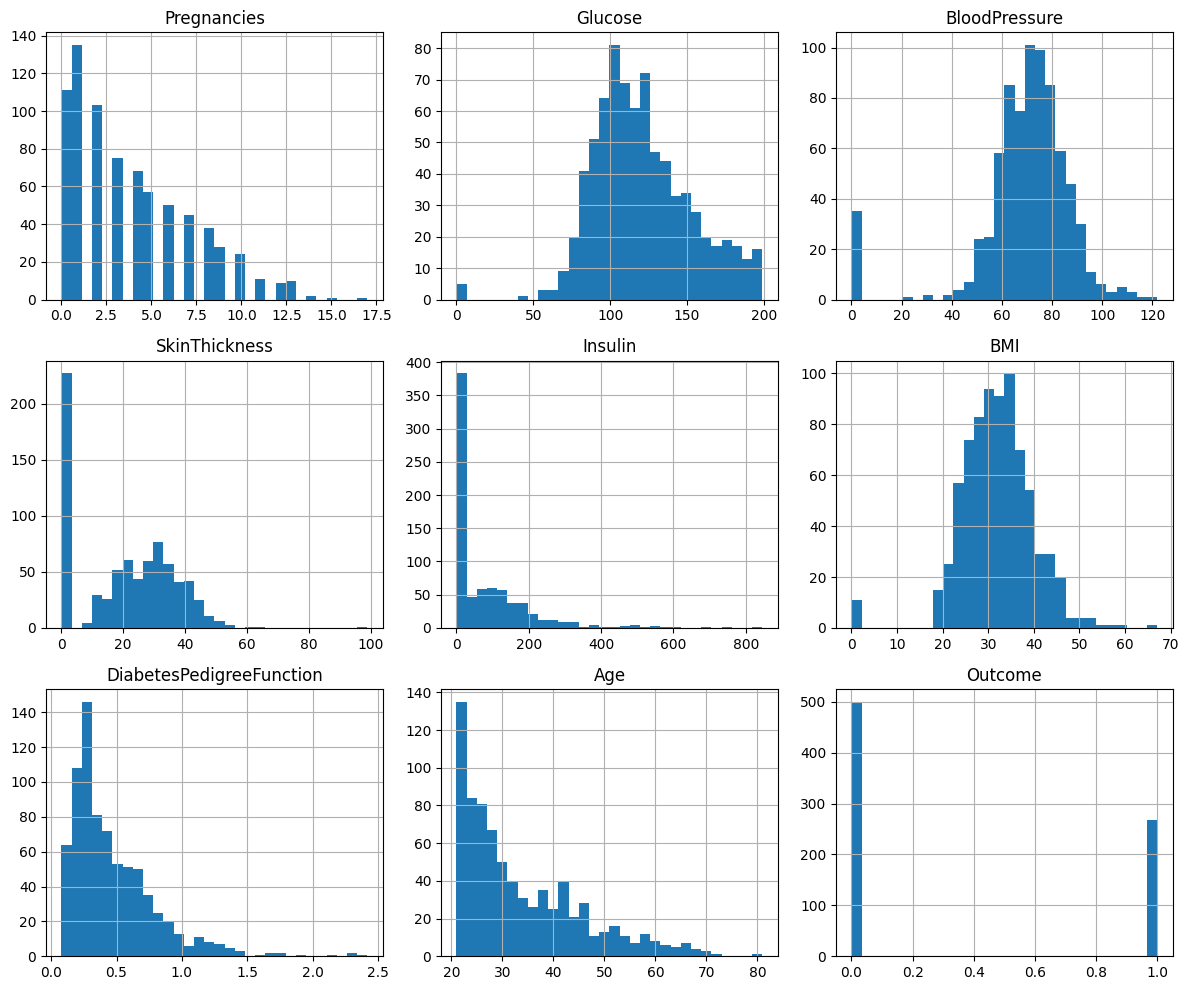

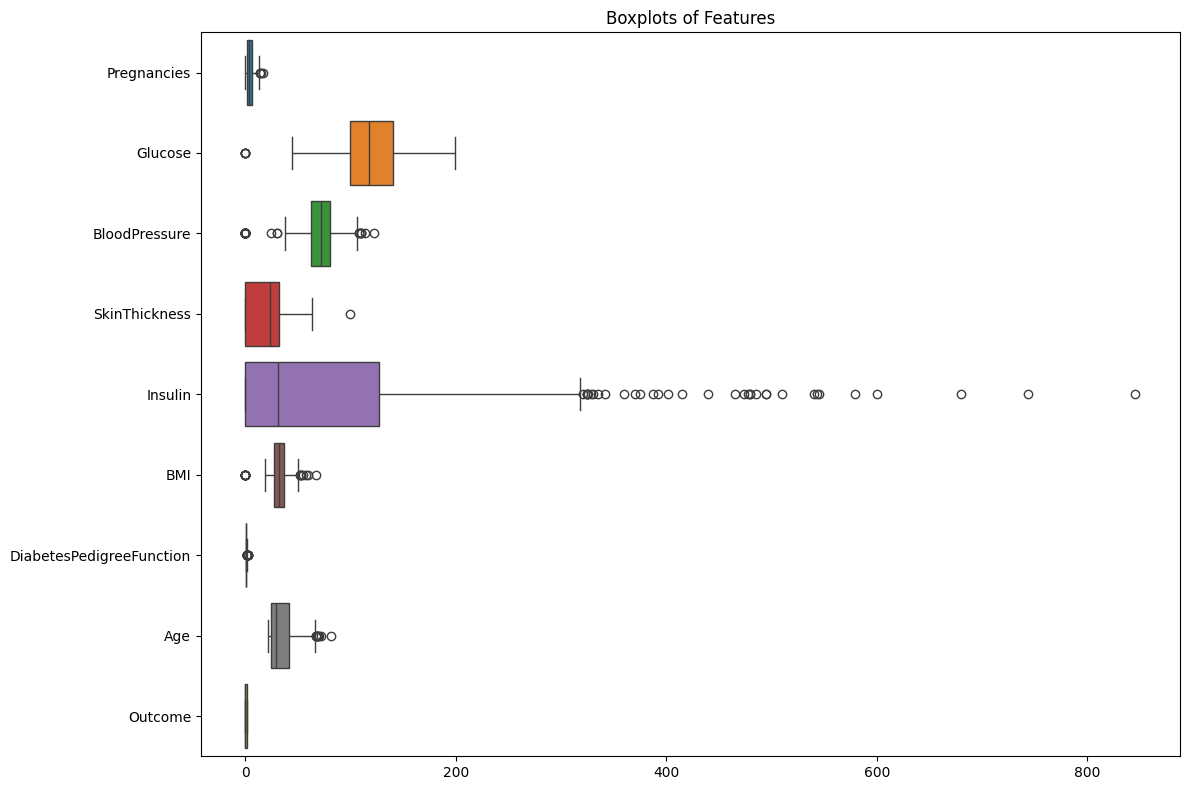

Target balance (Outcome):


Outcome
0    500
1    268
Name: count, dtype: int64

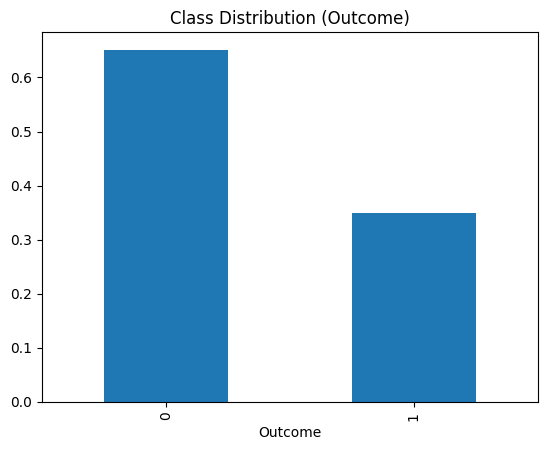

In [69]:
# List columns
print("Columns:", df.columns.tolist())

# Histograms for numeric columns
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots for quick outlier scan
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Features")
plt.tight_layout()
plt.show()

# Target balance
print("Target balance (Outcome):")
display(df['Outcome'].value_counts())
df['Outcome'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution (Outcome)')
plt.show()


### 2.2 Handle missing values and clean data

To clean the dataset:
- Replace zeros in the following columns with NaN (not a number):
  - Glucose, BloodPressure, SkinThickness, Insulin, and BMI
    - These features cannot be 0 in real clinical settings, so we treat them as missing data.
- After replacement, we impute the missing values using the median of each column to avoid skewing the dataset
- This ensures the data is biologically meaningful and ready for modeling.


In [70]:
# In the Pima dataset, zeros in these columns are biologically implausible and represent missing values.
cols_with_invalid_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count invalid zeros before
zero_counts_before = (df[cols_with_invalid_zero] == 0).sum()
print("Invalid zero counts BEFORE:", zero_counts_before.to_dict())

# Replace zeros with NaN for listed columns
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)

# Impute NaN with median per column
for c in cols_with_invalid_zero:
    df[c] = df[c].fillna(df[c].median())

# Verify after
zero_counts_after = (df[cols_with_invalid_zero] == 0).sum()
print("Invalid zero counts AFTER (should be 0 now):", zero_counts_after.to_dict())

# Confirm no NaNs remain
print("Any NaNs left?", df.isna().sum().sum())


Invalid zero counts BEFORE: {'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}
Invalid zero counts AFTER (should be 0 now): {'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}
Any NaNs left? 0


### 2.3 Feature Selection and Engineering

The dataset is already fully numeric, so no categorical encoding is required.

However, to follow best practices and meet the midterm requirement for feature engineering, one new feature was created:

- **BMI_Category** — groups BMI values into standard medical categories:
  - 0 = Underweight (< 18.5)
  - 1 = Normal (18.5–24.9)
  - 2 = Overweight (25–29.9)
  - 3 = Obese (≥ 30)

This feature may help classification models identify non-linear patterns between BMI and diabetes risk.

**Note:** Although this feature was created, it is not used in the modeling cases (Section 3) because:
- Continuous BMI retains more numeric detail than grouped categories.
- Models like Decision Trees, SVC, and Neural Networks can directly use numeric BMI without needing categories.

BMI_Category could still be useful for:
- Interpreting diabetes risk by weight grouping.
- Future models or visualizations.


In [71]:
# Create a new feature: BMI_Category based on medical classifications

def bmi_category(bmi):
    if bmi < 18.5:
        return 0   # Underweight
    elif bmi < 25:
        return 1   # Normal
    elif bmi < 30:
        return 2   # Overweight
    else:
        return 3   # Obese

df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Preview the new feature
df[['BMI', 'BMI_Category']].head(10)



,BMI,BMI_Category
0,33.6,3
1,26.6,2
2,23.3,1
3,28.1,2
4,43.1,3
5,25.6,2
6,31.0,3
7,35.3,3
8,30.5,3
9,32.3,3


**Reflection 2:**  
What patterns or anomalies do you see? Do any features stand out? 
- The histograms helped me see the overall distribution of each feature and identify unrealistic spikes at zero in insulin, skin thickness, glucose, etc. The boxplots confirmed these as anomalies and also showed outliers in insulin and BMI. This helped justify cleaning and imputing these values in Section 2

What preprocessing steps were necessary to clean and improve the data? 
- I noticed that some features in the dataset (like Glucose, BloodPressure, and BMI) had zeros, which are biologically impossible. These were treated as missing values and replaced using median imputation.

Did you create or modify any features to improve performance?
- To meet feature engineering expectations, I created a new feature called `BMI_Category`, which groups BMI values into underweight, normal, overweight, and obese ranges.
- I decided *not* to use BMI_Category in the main modeling cases because continuous BMI contains more detailed information.
- This engineered feature could still be useful for interpretability or future enhancements.






## Section 3. Feature Selection and Justification


### 3.1 Choose features and target

- **Target Variable (y):** `Outcome` (0 = No Diabetes, 1 = Diabetes)
- **Input Features (X):**  
We will test three different feature cases:

| Case | Features Used           | Description |
|------|--------------------------|-------------|
| Case 1 | `BMI`                    | Body Mass Index (weight / height²) |
| Case 2 | `Glucose`               | Plasma glucose concentration |
| Case 3 | `Glucose`, `BMI`        | Combination of two clinical predictors |

**Selection Justification**  
- `Glucose` is the strongest medical indicator of diabetes.  
- `BMI` measures potential obesity — a known risk factor.  
- Combining both allows the model to learn relationships between weight and glucose levels.


### 3.2 Define X and y


In [72]:
# Case 1: BMI only
X1 = df[['BMI']].dropna()
y1 = df.loc[X1.index, 'Outcome']

# Case 2: Glucose only
X2 = df[['Glucose']].dropna()
y2 = df.loc[X2.index, 'Outcome']

# Case 3: Glucose + BMI
X3 = df[['Glucose', 'BMI']].dropna()
y3 = df.loc[X3.index, 'Outcome']

print("Case 1 Shapes:", X1.shape, y1.shape)
print("Case 2 Shapes:", X2.shape, y2.shape)
print("Case 3 Shapes:", X3.shape, y3.shape)

print("Case 2 shape:", X2.shape, y2.shape)
print("Case 3 shape:", X3.shape, y3.shape)


Case 1 Shapes: (768, 1) (768,)
Case 2 Shapes: (768, 1) (768,)
Case 3 Shapes: (768, 2) (768,)
Case 2 shape: (768, 1) (768,)
Case 3 shape: (768, 2) (768,)


**Reflection 3:**  
Why did you choose these features?
- I chose Glucose and BMI because they are both medically linked to diabetes and showed meaningful variation in the data during exploration.  
  
How might `Glucose` and `BMI` impact predictions or accuracy?  
- Glucose levels are directly related to how the body processes sugar, and high glucose is a key indicator of diabetes. BMI is a measure of body fat, and higher BMI is often associated with insulin resistance and greater risk of developing diabetes.


## Section 4. Train a Model (Classification: Decision Tree)


### 4.1 Split the data into training and test sets using StratifiedShuffleSplit (80/20)

Stratified splitting is used to ensure the proportion of the target classes (0 = No Diabetes, 1 = Diabetes) remains consistent in both training and test sets.



In [73]:


# Case 1: BMI
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

# Case 2: Glucose
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

# Case 3: Glucose + BMI
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print("Case 1 - BMI | Train:", len(X1_train), "| Test:", len(X1_test))
print("Case 2 - Glucose | Train:", len(X2_train), "| Test:", len(X2_test))
print("Case 3 - Glucose + BMI | Train:", len(X3_train), "| Test:", len(X3_test))



Case 1 - BMI | Train: 614 | Test: 154
Case 2 - Glucose | Train: 614 | Test: 154
Case 3 - Glucose + BMI | Train: 614 | Test: 154


### 4.2 Train the Decision Tree model using Scikit-Learn


In [74]:

# Train a separate Decision Tree for each feature case
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate model performance using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix (visualized as a heatmap)


Decision Tree — Case 1 (BMI) — TRAINING RESULTS
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       400
           1       0.79      0.53      0.64       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.77       614

Decision Tree — Case 1 (BMI) — TEST RESULTS
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       100
           1       0.45      0.37      0.41        54

    accuracy                           0.62       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.62      0.61       154



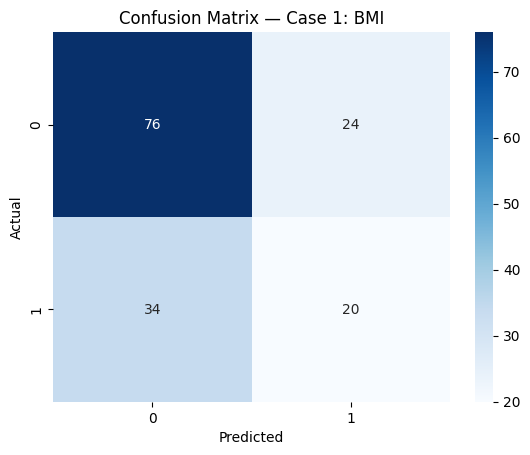

Decision Tree — Case 2 (Glucose) — TRAINING RESULTS
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       400
           1       0.79      0.54      0.64       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.75       614
weighted avg       0.79      0.79      0.78       614

Decision Tree — Case 2 (Glucose) — TEST RESULTS
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       100
           1       0.55      0.31      0.40        54

    accuracy                           0.67       154
   macro avg       0.62      0.59      0.59       154
weighted avg       0.65      0.67      0.64       154



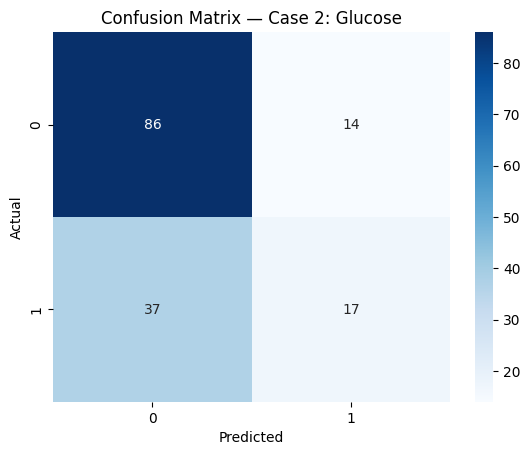

Decision Tree — Case 3 (Glucose + BMI) — TRAINING RESULTS
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       1.00      0.98      0.99       214

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614

Decision Tree — Case 3 (Glucose + BMI) — TEST RESULTS
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.56      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



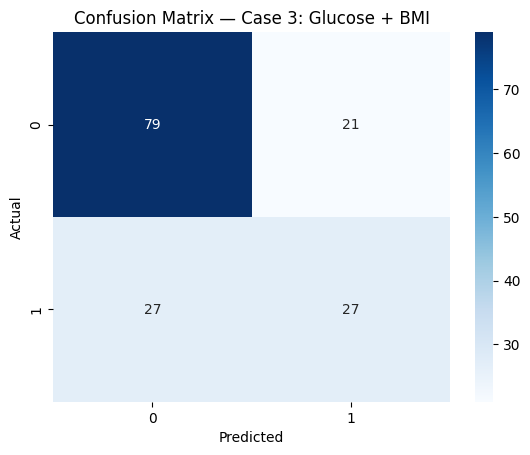

In [75]:

# ------ Case 1: BMI ------
print("Decision Tree — Case 1 (BMI) — TRAINING RESULTS")
print(classification_report(y1_train, tree_model1.predict(X1_train)))

print("Decision Tree — Case 1 (BMI) — TEST RESULTS")
y1_test_pred = tree_model1.predict(X1_test)
print(classification_report(y1_test, y1_test_pred))

sns.heatmap(confusion_matrix(y1_test, y1_test_pred), annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix — Case 1: BMI")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------ Case 2: Glucose ------
print("Decision Tree — Case 2 (Glucose) — TRAINING RESULTS")
print(classification_report(y2_train, tree_model2.predict(X2_train)))

print("Decision Tree — Case 2 (Glucose) — TEST RESULTS")
y2_test_pred = tree_model2.predict(X2_test)
print(classification_report(y2_test, y2_test_pred))

sns.heatmap(confusion_matrix(y2_test, y2_test_pred), annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix — Case 2: Glucose")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------ Case 3: Glucose + BMI ------
print("Decision Tree — Case 3 (Glucose + BMI) — TRAINING RESULTS")
print(classification_report(y3_train, tree_model3.predict(X3_train)))

print("Decision Tree — Case 3 (Glucose + BMI) — TEST RESULTS")
y3_test_pred = tree_model3.predict(X3_test)
print(classification_report(y3_test, y3_test_pred))

sns.heatmap(confusion_matrix(y3_test, y3_test_pred), annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix — Case 3: Glucose + BMI")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Reflection 4:**  
How well did the model perform?
- The Decision Tree performed differently depending on which features were used.
- Case 1 (BMI only) produced the weakest results (Accuracy = 0.62, F1 = 0.41). BMI by itself doesn't separate diabetes vs non-diabetes well.
- Case 2 (Glucose only) showed improvement (Accuracy = 0.67), confirming that glucose is a stronger medical indicator of diabetes.
- Case 3 (Glucose + BMI) performed the best with 71% accuracy. However, there was some overfitting, because accuracy on the training set was 99%, but dropped to 71% on test data.
 
Any surprises in the results?
- The most surprising part was how much better the model performed when combining features, even though only two variables were used.


## Section 5. Improve the Model or Try Alternates


### 5.1 Train an alternative classifier (Support Vector Machine - SVC)

We will follow the same process as the Decision Tree section, using three cases:

- Case 1: Feature = BMI  
- Case 2: Feature = Glucose  
- Case 3: Features = Glucose + BMI  

We will train a Support Vector Classifier (SVC) for each case and evaluate using accuracy, precision, recall, F1-score, and confusion matrix.



Results for SVC on test data (Case 1 - BMI):
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       100
           1       0.50      0.15      0.23        54

    accuracy                           0.65       154
   macro avg       0.58      0.53      0.50       154
weighted avg       0.61      0.65      0.58       154



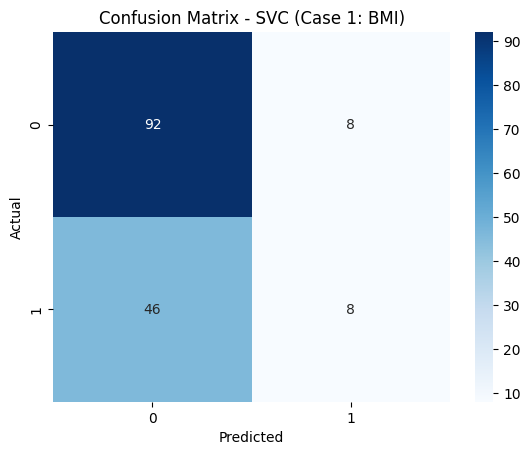

In [76]:
# CASE 1: SVC using BMI
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)

# Predictions
y1_svc_pred = svc_model1.predict(X1_test)

# Classification Report
print("Results for SVC on test data (Case 1 - BMI):")
print(classification_report(y1_test, y1_svc_pred))

# Confusion Matrix Heatmap
cm1_svc = confusion_matrix(y1_test, y1_svc_pred)
sns.heatmap(cm1_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC (Case 1: BMI)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Results for SVC on test data (Case 2 - Glucose):
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.61      0.37      0.46        54

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



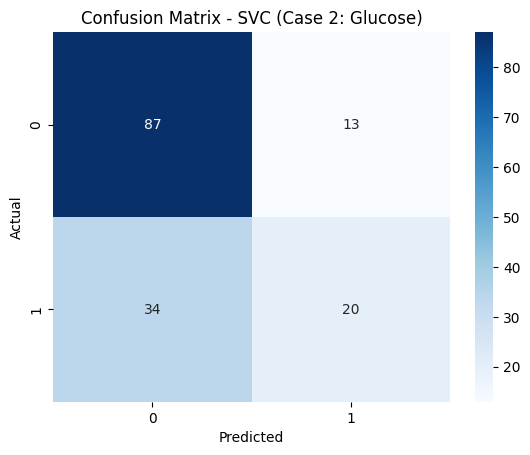

In [77]:
# CASE 2: SVC using Glucose
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)

# Predictions
y2_svc_pred = svc_model2.predict(X2_test)

# Classification Report
print("Results for SVC on test data (Case 2 - Glucose):")
print(classification_report(y2_test, y2_svc_pred))

# Confusion Matrix Heatmap
cm2_svc = confusion_matrix(y2_test, y2_svc_pred)
sns.heatmap(cm2_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC (Case 2: Glucose)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Results for SVC on test data (Case 3 - Glucose + BMI):
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.62      0.39      0.48        54

    accuracy                           0.70       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



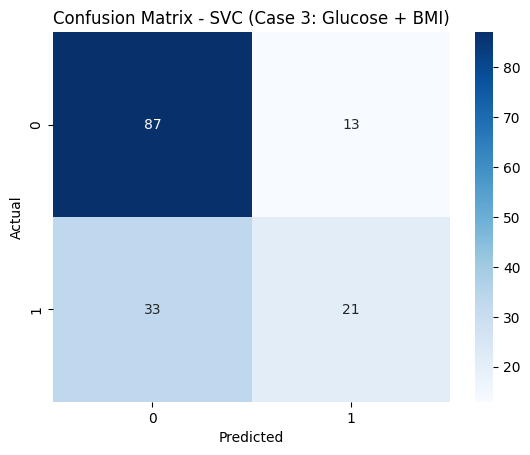

In [78]:
# CASE 3: SVC using Glucose + BMI
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)

# Predictions
y3_svc_pred = svc_model3.predict(X3_test)

# Classification Report
print("Results for SVC on test data (Case 3 - Glucose + BMI):")
print(classification_report(y3_test, y3_svc_pred))

# Confusion Matrix Heatmap
cm3_svc = confusion_matrix(y3_test, y3_svc_pred)
sns.heatmap(cm3_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC (Case 3: Glucose + BMI)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5.2 Compare performance of all models across the same metrics

At this point, we have two models trained and tested:
- **Decision Tree Classifier**
- **Support Vector Classifier (SVC)**

Both were evaluated on the same training/test splits using:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix


**Reflection 5:**  
Which model performed better? 
- The Decision Tree Case 3 performed slightly better overall (Accuracy = 0.71) compared to the best SVC version (0.70).
- SVC Case 3 was close, but it struggled more with detecting diabetes cases (Recall = 0.39) compared to Decision Tree (0.56).
  
Why might one classifier be more effective in this specific case?
- Decision Trees seem to handle this dataset better because:
  - They capture non-linear cutoffs.
  - SVC usually performs best after feature scaling and tuning hyperparameters.


## Section 6. Final Thoughts & Insights

**6.1 Summary of Findings:** 

Summary:

- Glucose is the strongest single predictor of diabetes.
- BMI alone is not sufficient to make accurate predictions.
- Combining Glucose + BMI gives the best model accuracy in both Decision Tree and SVC.
- Decision Tree (Case 3) was the highest-performing overall model with 71% accuracy.
- SVC struggled to detect diabetes cases unless glucose was included.
- Data cleaning (replacing zeros) was essential for correct model training.

| Model Type        | Case | Features Used     | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Notes |
|-------------------|------|-------------------|----------|----------------------|------------------|---------------------|-------|
| Decision Tree     | 1    | BMI               | 0.62     | 0.45                 | 0.37             | 0.41                | Lower performance |
| Decision Tree     | 2    | Glucose           | 0.67     | 0.55                 | 0.31             | 0.40                | Better than BMI   |
| Decision Tree     | 3    | Glucose + BMI     | 0.71     | 0.59                 | 0.56             | 0.57                | Best Decision Tree |
| SVC (RBF Kernel)  | 1    | BMI               | 0.65     | 0.50                 | 0.15             | 0.23                | Struggles with Class 1 |
| SVC (RBF Kernel)  | 2    | Glucose           | 0.69     | 0.61                 | 0.37             | 0.46                | Glucose improves results |
| SVC (RBF Kernel)  | 3    | Glucose + BMI     | 0.70     | 0.62                 | 0.39             | 0.48                | Best SVC case     |



**6.2 Challenges:**   
- Many health measurements had zeros (e.g., Glucose = 0), which are medically impossible so we treated as missing data and replaced with medians.
- Class imbalance: 65% non-diabetic vs 35% diabetic.
- Decision Tree overfitting: Training accuracy reached 99%, while test accuracy was much lower (71%).


**6.3 Next Steps:** 
- I would like to add more features and try scaling.  Later, I would like to try Logistic Regression.


**Reflection 6:**  

This project reinforced what we learned in module 3 while working with the Titanic dataset.  I learned that feature choice definitely matters and even simple models can give valuable insights when evaluated carefully and thoughtfully.  I am excited to learn about regression to try it out on different datasets.